<div class="alert alert-block alert-info">
<center> <h1> MACHINE LEARNING MDSAA-BA </h1> </center> <br>
<center> TECHSCAPE PROJECT 2021/2022 </center>

### DÚVIDAS:

### TO DO:

<a class="anchor" id="import">

# 1. Import

</a>

**Table of Contents** <br>
* [1) Import](#import)
    * [1.1) Import Libraries](#importlibraries)
    * [1.2) Import the Dataset](#importdataset)
* [2) Data Exploration](#dataexploration)
    * [2.1) Check for Missing Values](#missingvalues)
    * [2.2) Change Data Types](#datatypes)
    * [2.3) Coherence Checking](#coherence)
* [3) Feature Engineering](#feateng)   
* [4) Feature Selection](#featsel)      
    * [4.1) Choose the most relevant Features](#relevantfeat)
    * [4.2) PCA Analysis](#pca)
    * [4.3) Final Insights](#finalinsights)
* [5) Model Training](#mdltrain) 
    * [5.1) Function to run all grids](#rungrids)
    * [5.2) Function to the test the performance of the models](#functperfor)
    * [5.3) Models to test](#modeltest)
        * [5.3.1) Decision Tree](#dt)
        * [5.3.2) Neural Network](#nn)
        * [5.3.3) K-Nearest Neighbors](#knn)
        * [5.3.4) Naive Bayes](#nb)
        * [5.3.5) Support Vector Machine](#svm)
        * [5.3.6) Ridge Classifier](#rc)
        * [5.3.7) Ensemble Methods](#em)
        * [5.3.7.1) Bagging meta-estimator](#b)
        * [5.3.7.2) Random Forest](#rf)
        * [5.3.7.3) Extremely Randomized Trees](#erf)
        * [5.3.7.4) ADA Boost](#ada)
        * [5.3.7.5) Histogram-Based Gradient Boosting](#hgb)
        * [5.3.7.6) Voting Classifier](#vc)
        * [5.3.7.7) Gradient Boost](#gb)
        * [5.3.7.8) Stacking](#s)
        * [5.3.8) Choose the Best Model and the Best Scalling Method](#best)
    * [5.4) Performance Measures](#perfmeasures)
* [6) Model Deployment](#deployment) 
    
        

<a class="anchor" id="importlibraries">

## 1.1) Import Libraries

</a>

In [66]:
import pandas as pd
import math
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import calendar

import scipy.stats as stats
from scipy.stats import chi2_contingency

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.decomposition import PCA

from sklearn.neural_network import MLPClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import IsolationForest

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

<a class="anchor" id="importdataset">

## 1.2. Import the Dataset

</a>

In [67]:
techscape = pd.read_csv('train.csv')

print(techscape.shape)
techscape.head(3)

(9999, 17)


,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor,Buy
0,102863333,21-Mar-20,0,0.0,0,0.0,3,64.0,0.0000,0.0667,0.0,MacOSX,2,Portugal,1,Returner,0
1,103117814,20-May-20,0,0.0,0,0.0,23,684.5,0.0217,0.0449,0.0,Windows,2,France,6,Returner,0
2,103201891,4-Dec-20,0,0.0,0,0.0,8,95.0,0.0250,0.0583,0.0,Windows,4,Italy,1,Returner,0


<a class="anchor" id="dataexploration">

# 2) Data Exploration

</a>

<a class="anchor" id="missingvalues">

## 2.1) Check for Missing Values

</a>

In [68]:
techscape.info()
# There are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Access_ID                   9999 non-null   int64  
 1   Date                        9999 non-null   object 
 2   AccountMng_Pages            9999 non-null   int64  
 3   AccountMng_Duration         9999 non-null   float64
 4   FAQ_Pages                   9999 non-null   int64  
 5   FAQ_Duration                9999 non-null   float64
 6   Product_Pages               9999 non-null   int64  
 7   Product_Duration            9999 non-null   float64
 8   GoogleAnalytics_BounceRate  9999 non-null   float64
 9   GoogleAnalytics_ExitRate    9999 non-null   float64
 10  GoogleAnalytics_PageValue   9999 non-null   float64
 11  OS                          9999 non-null   object 
 12  Browser                     9999 non-null   int64  
 13  Country                     9999 

<a class="anchor" id="datatypes">

## 2.2) Change Data Types

</a>

In [69]:
def change_data_types(df):
    # ID does not make sense to be a int
    df.Access_ID = df.Access_ID.astype('string') 

    # Tranform Date into a datetime format
    df.Date = pd.to_datetime(df.Date)
    
    # Transform these variables into Strings
    df.OS = df.OS.astype('string') 
    df.Country = df.Country.astype('string') 
    df.Type_of_Visitor = df.Type_of_Visitor.astype('string') 
    df.Type_of_Traffic = df.Type_of_Traffic.astype('string') 
    df.Browser = df.Browser.astype('string') 
    
    return df


# Call the function created above (with techscape)
techscape = change_data_types(techscape)
techscape.dtypes

Access_ID                             string
Date                          datetime64[ns]
AccountMng_Pages                       int64
AccountMng_Duration                  float64
FAQ_Pages                              int64
FAQ_Duration                         float64
Product_Pages                          int64
Product_Duration                     float64
GoogleAnalytics_BounceRate           float64
GoogleAnalytics_ExitRate             float64
GoogleAnalytics_PageValue            float64
OS                                    string
Browser                               string
Country                               string
Type_of_Traffic                       string
Type_of_Visitor                       string
Buy                                    int64
dtype: object

<a class="anchor" id="coherence">

## 2.3) Coherence Checking

</a>

In [70]:
# Incoherencies between Pages and Duration variables
def inchorencies_check(df):
    
    mng_pages_index = df[(df['AccountMng_Pages']==0) & (df['AccountMng_Duration']>0) ].index # --> 0
    df.loc[mng_pages_index,'AccountMng_Pages'] = 1

    mng_duration_index = df[(df['AccountMng_Pages']>0) & (df['AccountMng_Duration']==0) ].index  # --> 3
    df.loc[mng_duration_index,'AccountMng_Duration'] = 1


    # --------------------------------------------------------------
    faq_pages_index = df[(df['FAQ_Pages']==0) & (df['FAQ_Duration']>0) ].index # --> 0
    df.loc[faq_pages_index,'FAQ_Pages'] = 1

    faq_duration_index = df[(df['FAQ_Pages']>0) & (df['FAQ_Duration']==0) ].index  # --> 9
    df.loc[faq_duration_index,'FAQ_Duration'] = 1


    # --------------------------------------------------------------
    prod_pages_index = df[(df['Product_Pages']==0) & (df['Product_Duration']>0) ].index # --> 0
    df.loc[prod_pages_index,'Product_Pages'] = 1

    prod_duration_index = df[(df['Product_Pages']>0) & (df['Product_Duration']==0) ].index  # --> 130
    df.loc[prod_duration_index,'Product_Duration'] = 1
    
    return df


# Call the function created above (with techscape)
techscape = inchorencies_check(techscape)
techscape.shape

(9999, 17)

<a class="anchor" id="feateng">

# 3) Feature Engineering

</a>

In [71]:
def create_new_variables(df):
    
    # Create binary variables for the most common operating systems
    df['Apple'] = df['OS'].apply(lambda x: bool(1) if x == 'MacOSX' or x == 'iOS' else bool(0))  
    df['Windows'] = df['OS'].apply(lambda x: bool(1) if x == 'Windows' else bool(0))  
    df['Android'] = df['OS'].apply(lambda x: bool(1) if x == 'Android' else bool(0))

    # Create binary variables for type of visitors
    df['Returner'] = df['Type_of_Visitor'].apply(lambda x: bool(1) if x == 'Returner' else bool(0)) 
    df['New_Access'] = df['Type_of_Visitor'].apply(lambda x: bool(1) if x == 'New_Access' else bool(0))

    # Create the total duration of the visits and total number of page visits
    df['Total_Duration'] = df['AccountMng_Duration'] + df['FAQ_Duration'] + df['Product_Duration']
    df['Total_Pages'] = df['AccountMng_Pages'] + df['FAQ_Pages'] + df['Product_Pages']
        
    # Correct incoherent values of total_pages and total_duration
    df.loc[df['Total_Pages']==0,'Total_Pages']=1
    df.loc[df['Total_Duration']==0,'Total_Duration']=1

    # Create the proportion of time on each page type
    df['PropTime_AccountMng'] = df['AccountMng_Duration']/df['Total_Duration']
    df['PropTime_FAQ'] = df['FAQ_Duration']/df['Total_Duration']
    df['PropTime_Product'] = df['Product_Duration']/df['Total_Duration']

    # Create the proportion of visited pages of each type
    df['PropPages_AccountMng'] = df['AccountMng_Pages']/df['Total_Pages']
    df['PropPages_FAQ'] = df['FAQ_Pages']/df['Total_Pages']
    df['PropPages_Product'] = df['Product_Pages']/df['Total_Pages']

    # Create the average time spent per page and type of page
    df['AvgTimePerPage'] = df['Total_Duration'].div(df['Total_Pages'].values)

    df['AvgTimeOnAccountMng'] = df['AccountMng_Duration'].div(df['AccountMng_Pages'].values)
    df['AvgTimeOnFAQ'] = df['FAQ_Duration'].div(df['FAQ_Pages'].values)
    df['AvgTimeOnProduct'] = df['Product_Duration'].div(df['Product_Pages'].values)

    # Correct incoherent values of AvgTimeOnAccountMng, AvgTimeOnFAQ and AvgTimeOnProduct
    df.loc[df['AccountMng_Pages']==0,'AvgTimeOnAccountMng']=0
    df.loc[df['FAQ_Pages']==0,'AvgTimeOnFAQ']=0
    df.loc[df['Product_Pages']==0,'AvgTimeOnProduct']=0

    # Create the month of the visit
    df['Month'] = df['Date'].dt.month

    # Create variable Covid
    df['Covid'] = df['Month'].apply(lambda x: bool(1) if x>3 else bool(0))

    # Create dummy variables from the categorical ones
    df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
    month = pd.DataFrame(pd.get_dummies(df['Month'], drop_first = True, dtype=bool))

    df['Type_of_Traffic'] = df['Type_of_Traffic'].apply(lambda x: 'Traffic_' + str(x))
    type_traffic = pd.DataFrame(pd.get_dummies(df['Type_of_Traffic'], drop_first = True, dtype=bool))

    df['Browser'] = df['Browser'].apply(lambda x: 'Browser_' + str(x))
    browser = pd.DataFrame(pd.get_dummies(df['Browser'], drop_first = True, dtype=bool))
    
    country=pd.DataFrame(pd.get_dummies(df['Country'], drop_first = True, dtype=bool))

    df = pd.concat((df,month,type_traffic,browser,country), axis=1)
    
    # Remove unwanted columns from the dataset
    df.drop('OS', axis=1, inplace=True)
    df.drop('Country', axis=1, inplace=True)
    df.drop('Type_of_Visitor', axis=1, inplace=True)
    df.drop('Browser', axis=1, inplace=True)
    df.drop('Type_of_Traffic', axis=1, inplace=True)
    df.drop('Date', axis=1, inplace=True)
    df.drop('Month', axis=1, inplace=True)
    
    return df


# Call the function created above (with techscape)
techscape = create_new_variables(techscape)
print(techscape.shape)
display(techscape.head(3))

(9999, 71)


,Access_ID,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,...,Browser_7,Browser_8,France,Germany,Italy,Other,Portugal,Spain,Switzerland,United Kingdom
0,102863333,0,0.0,0,0.0,3,64.0,0.0000,0.0667,0.0,...,False,False,False,False,False,False,True,False,False,False
1,103117814,0,0.0,0,0.0,23,684.5,0.0217,0.0449,0.0,...,False,False,True,False,False,False,False,False,False,False
2,103201891,0,0.0,0,0.0,8,95.0,0.0250,0.0583,0.0,...,False,False,False,False,True,False,False,False,False,False


In [72]:
# Remove column Access_ID
techscape.drop('Access_ID', axis=1, inplace=True)

# See descriptive statistics for the numeric variables
techscape.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountMng_Pages,9999.0,2.324232,3.340676,0.000000,0.000000,1.000000,4.000000,27.0000
AccountMng_Duration,9999.0,81.217155,179.710469,0.000000,0.000000,7.500000,92.208350,3398.7500
FAQ_Pages,9999.0,0.508051,1.279390,0.000000,0.000000,0.000000,0.000000,24.0000
FAQ_Duration,9999.0,34.576703,139.792699,0.000000,0.000000,0.000000,0.000000,2549.3750
Product_Pages,9999.0,31.685869,44.550277,0.000000,7.000000,18.000000,38.000000,705.0000
Product_Duration,9999.0,1199.828936,1958.239857,0.000000,183.562500,599.000000,1470.270800,63973.5222
GoogleAnalytics_BounceRate,9999.0,0.022305,0.048776,0.000000,0.000000,0.003200,0.016800,0.2000
GoogleAnalytics_ExitRate,9999.0,0.043181,0.048845,0.000000,0.014300,0.025100,0.050000,0.2000
GoogleAnalytics_PageValue,9999.0,5.963120,18.753626,0.000000,0.000000,0.000000,0.000000,361.7637
Buy,9999.0,0.155216,0.362128,0.000000,0.000000,0.000000,0.000000,1.0000


<a class="anchor" id="featsel">

# 4) Feature Selection

</a>

In [73]:
# Define data as all the independent variables
data = techscape.drop(['Buy'], axis=1)
# Define target as the dependent variable
target = techscape['Buy']


# Subset of data including only the numerical features
data_metric = data.select_dtypes(include=np.number).set_index(data.index)
data_non_metric = data.select_dtypes(exclude=np.number).set_index(data.index)

# Scale the data
data_metric_scaled = pd.DataFrame(MinMaxScaler().fit_transform(data_metric), columns = data_metric.columns).set_index(data.index)

#### Filter Methods:

In [74]:
# Check if any of the variables is univariate
data_metric_scaled.var()

# There aren't univariate variables
# Keep: all
# Remove: none

AccountMng_Pages              0.015309
AccountMng_Duration           0.002796
FAQ_Pages                     0.002842
FAQ_Duration                  0.003007
Product_Pages                 0.003993
Product_Duration              0.000937
GoogleAnalytics_BounceRate    0.059477
GoogleAnalytics_ExitRate      0.059647
GoogleAnalytics_PageValue     0.002687
Total_Duration                0.000891
Total_Pages                   0.003914
PropTime_AccountMng           0.022843
PropTime_FAQ                  0.005731
PropTime_Product              0.029752
PropPages_AccountMng          0.016076
PropPages_FAQ                 0.002479
PropPages_Product             0.020185
AvgTimePerPage                0.000952
AvgTimeOnAccountMng           0.000841
AvgTimeOnFAQ                  0.001380
AvgTimeOnProduct              0.001019
dtype: float64

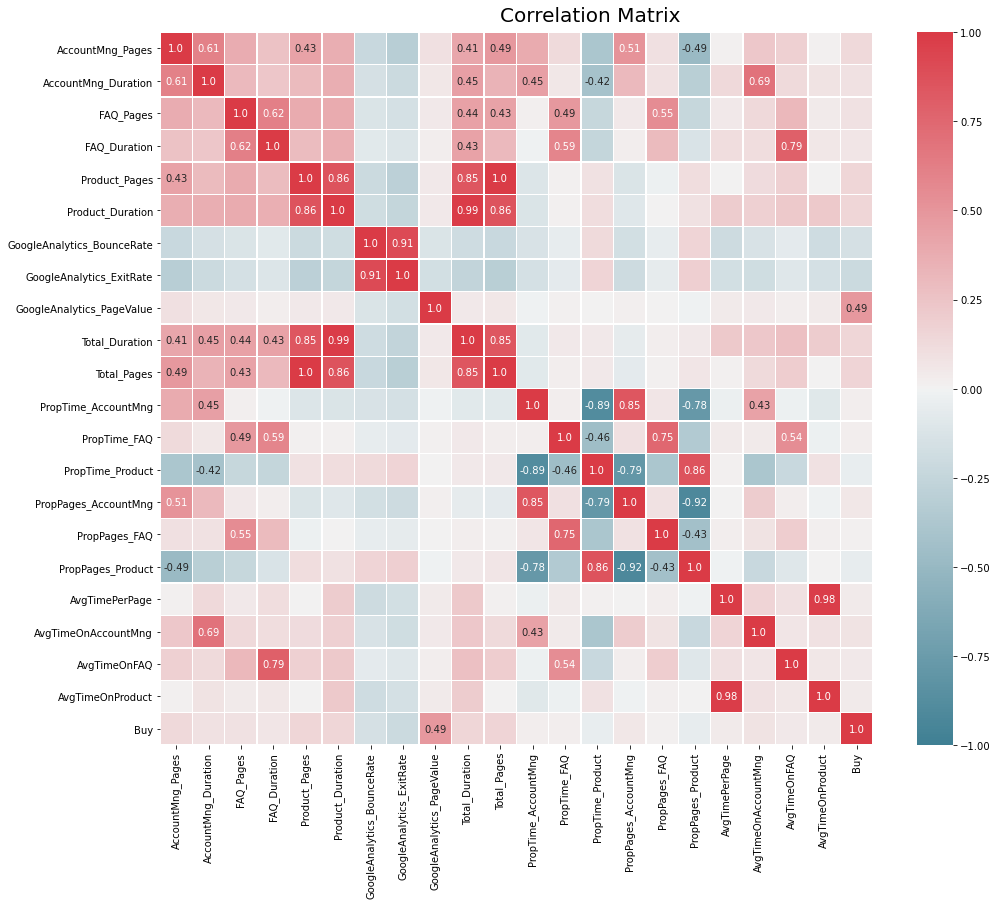

In [75]:
# ------------ Spearman Correlation ------------

# Check correlations
all_data = data_metric_scaled.join(target)

# Prepare figure
fig = plt.figure(figsize=(16, 12))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(all_data.corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.4| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.4
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)


plt.show()

In [76]:
# Better visualization of correlation values (numerical data)

#corr.style.applymap(lambda x: 'background-color : green' if x > 0.85 else ('background-color : red' if x < -0.85 else ''))

# Higly correlated variables:
# Product_Pages - Product_Duration
# Product_Pages - Total_Pages
# Product_Duration - Total_Pages
# Product_Duration - Total_Duration
# GoogleAnalytics_BounceRate - GoogleAnalytics_ExitRate
# PropTime_AccountMng - PropTime_Product
# PropPages_AccountMng - PropPages_Product
# AvgTimePerPage - AvgTimeOnProduct

#### Wrapper and Embeded Methods:

In [58]:
# Create a Stratified KFold with 10 splits
skf = StratifiedKFold(n_splits=10)

In [59]:
#----------------------------- Lasso and Decision Tree -----------------------------
#fold = 1
#
#for train_index, val_index in skf.split(data_metric, target):
#        
#        # Data Partition
#        X_train, X_val = data_metric.iloc[train_index], data_metric.iloc[val_index]
#        y_train, y_val = target.iloc[train_index], target.iloc[val_index]
#        
#        # Scaling the data with MinMaxScaler
#        scaler = MinMaxScaler().fit(X_train)
#        
#        X_train_metric_scaled = scaler.transform(X_train) # this will return an array
#        X_train_metric_scaled = pd.DataFrame(X_train_metric_scaled, columns = X_train.columns)#.set_index(X_train.index)
#
#        X_val_metric_scaled = scaler.transform(X_val)
#        X_val_metric_scaled = pd.DataFrame(X_val_metric_scaled, columns = X_val.columns)#.set_index(X_val.index)
#        
#        
#        # CODE FOR LASSO
#        reg = LassoCV()
#        lasso = reg.fit(X_train_metric_scaled, y_train)
#        importance = np.abs(lasso.coef_)
#        
#        # CODE FOR DT
#        gini_importance = DecisionTreeClassifier().fit(X = X_train_metric_scaled, y = y_train).feature_importances_
#        entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X = X_train_metric_scaled, y = y_train).feature_importances_
#        
#        
#        if fold == 1:
#            # Create three empty data frames
#            lasso_results = pd.DataFrame(index = X_train_metric_scaled.columns)
#            gini_results = pd.DataFrame(index = X_train_metric_scaled.columns)
#            entropy_results = pd.DataFrame(index = X_train_metric_scaled.columns)
#            
#        importance_values = pd.Series(importance, index = X_train_metric_scaled.columns, name=f'Partition {fold}')
#        gini_values = pd.Series(gini_importance, index = X_train_metric_scaled.columns, name=f'Partition {fold}')
#        entropy_values = pd.Series(entropy_importance, index = X_train_metric_scaled.columns, name=f'Partition {fold}')
#
#        lasso_results = pd.concat((lasso_results, importance_values), axis=1)
#        gini_results = pd.concat((gini_results, gini_values), axis=1)
#        entropy_results = pd.concat((entropy_results, entropy_values), axis=1)
#        
#        fold+=1
#               
#        
## Add new column with average of importance        
#importance_lasso_list = []
#importance_gini_list = []
#importance_entropy_list = []
#
#for index, row in lasso_results.iterrows():
#    count = 0
#    for elem in row:
#        count+=elem
#    average = count / 10
#    importance_lasso_list.append(average)
#
#for index, row in gini_results.iterrows():
#    count = 0
#    for elem in row:
#        count+=elem
#    average = count / 10
#    importance_gini_list.append(average)
#    
#for index, row in entropy_results.iterrows():
#    count = 0
#    for elem in row:
#        count+=elem
#    average = count / 10
#    importance_entropy_list.append(average)
#
#lasso_results['Average of LASSO Importance'] = importance_lasso_list 
#gini_results['Average of Gini Importance'] = importance_gini_list
#entropy_results['Average of Entropy Importance'] = importance_entropy_list
#dt_results = pd.merge(gini_results['Average of Gini Importance'], entropy_results['Average of Entropy Importance'], left_index = True, right_index = True)
#importance_results = pd.merge(dt_results, lasso_results['Average of LASSO Importance'], left_index = True, right_index = True)
#
#lasso_results.style.applymap(lambda x: 'background-color : green' if x > 0.01 else ('background-color : red' if x < -0.85 else ''))
#
#importance_results.sort_values(by=['Average of LASSO Importance','Average of Gini Importance','Average of Entropy Importance'], ascending=False)

In [60]:
#----------------------------- RFE -----------------------------
#fold = 1
#
#for train_index, val_index in skf.split(data_metric, target):
#        
#        # Data Partition
#        X_train, X_val = data_metric.iloc[train_index], data_metric.iloc[val_index]
#        y_train, y_val = target.iloc[train_index], target.iloc[val_index]
#        
#        # Scaling the data with MinMaxScaler
#        scaler = MinMaxScaler().fit(X_train)
#        
#        X_train_metric_scaled = scaler.transform(X_train) # this will return an array
#        X_train_metric_scaled = pd.DataFrame(X_train_metric_scaled, columns = X_train.columns)#.set_index(X_train.index)
#
#        X_val_metric_scaled = scaler.transform(X_val)
#        X_val_metric_scaled = pd.DataFrame(X_val_metric_scaled, columns = X_val.columns)#.set_index(X_val.index)
#        
#        
#        # CODE FOR RFE
#        nof_list = np.arange(1,len(data_metric.columns)+1)  # Array from 1 to 21           
#        high_score = 0
#        nof = 0  # Variable to store the optimum number of features
#        
#        for n in nof_list:
#            
#            model = LogisticRegression()
#            rfe = RFE(model, n)
#            
#            X_train_rfe = rfe.fit_transform(X_train_metric_scaled,y_train)
#            X_val_rfe = rfe.transform(X_val_metric_scaled)
#            
#            model.fit(X_train_rfe,y_train)
#
#            score = model.score(X_val_rfe,y_val)
#            
#            if (score > high_score):
#                high_score = score
#                nof = n
#                selected_features = pd.Series(rfe.support_, index = X_train_metric_scaled.columns, name=f'Partition {fold}')
#                
#        if fold == 1:
#            # Create empty data frame
#            rfe_results = pd.DataFrame(index = X_train_metric_scaled.columns)
#        
#        # Concatenate variables chosen at each partition
#        rfe_results = pd.concat((rfe_results, selected_features), axis=1)
#        
#        print('Fold ',fold)
#        fold+=1
#
## Add new column with count of True's        
#count_rfe_list = []
#for index, row in rfe_results.iterrows():
#    count = 0
#    for elem in row:
#        if elem == True:
#            count+=1
#    count_rfe_list.append(count)
#
#rfe_results['Count'] = count_rfe_list
#
#rfe_results.sort_values(by='Count', ascending=False)

In [61]:
# ------------ Backward Regression  ------------
#fold = 1
#
#for train_index, val_index in skf.split(data_metric, target):
#        
#        # Data Partition
#        X_train, X_val = data_metric.iloc[train_index], data_metric.iloc[val_index]
#        y_train, y_val = target.iloc[train_index], target.iloc[val_index]
#        
#        # Scaling the data with MinMaxScaler
#        scaler = MinMaxScaler().fit(X_train)
#        
#        X_train_metric_scaled = scaler.transform(X_train) # this will return an array
#        X_train_metric_scaled = pd.DataFrame(X_train_metric_scaled, columns = X_train.columns)#.set_index(X_train.index)
#
#        X_val_metric_scaled = scaler.transform(X_val)
#        X_val_metric_scaled = pd.DataFrame(X_val_metric_scaled, columns = X_val.columns)#.set_index(X_val.index)
#        
#        
#        # CODE FOR BACKWARD REGRESSION
#        sfs_backward = SequentialFeatureSelector(LogisticRegression(), n_features_to_select=5, direction="backward")
#        sfs_backward.fit(X = X_train_metric_scaled, y = y_train)
#
#        selected_features = pd.Series(sfs_backward.support_, index = X_train_metric_scaled.columns, name=f'Partition {fold}')
#        
#        if fold == 1:
#            # Create empty data frame
#            backward_results = pd.DataFrame(index = X_train_metric_scaled.columns)
#            
#        backward_results = pd.concat((backward_results, selected_features), axis=1)
#        
#        print('Fold ',fold)
#        fold+=1
#        
#        
## Add new column with count of True's        
#count_backward_list = []
#for index, row in backward_results.iterrows():
#    count = 0
#    for elem in row:
#        if elem == True:
#            count+=1
#    count_backward_list.append(count)
#
#backward_results['Count'] = count_backward_list 
#backward_results.sort_values(by='Count', ascending=False)

In [62]:
# ------------ Forward Regression  ------------
#fold = 1
#
#for train_index, val_index in skf.split(data_metric, target):
#        
#        # Data Partition
#        X_train, X_val = data_metric.iloc[train_index], data_metric.iloc[val_index]
#        y_train, y_val = target.iloc[train_index], target.iloc[val_index]
#        
#        # Scaling the data with MinMaxScaler
#        scaler = MinMaxScaler().fit(X_train)
#        
#        X_train_metric_scaled = scaler.transform(X_train) # this will return an array
#        X_train_metric_scaled = pd.DataFrame(X_train_metric_scaled, columns = X_train.columns)#.set_index(X_train.index)
#
#        X_val_metric_scaled = scaler.transform(X_val)
#        X_val_metric_scaled = pd.DataFrame(X_val_metric_scaled, columns = X_val.columns)#.set_index(X_val.index)
#        
#        
#        # CODE FOR FORWARD REGRESSION
#        sfs_forward = SequentialFeatureSelector(LogisticRegression(), n_features_to_select=5, direction="forward")
#        sfs_forward.fit(X = X_train_metric_scaled, y = y_train)
#
#        selected_features = pd.Series(sfs_forward.support_, index = X_train_metric_scaled.columns, name=f'Partition {fold}')
#        
#        if fold == 1:
#            # Create empty data frame
#            forward_results = pd.DataFrame(index = X_train_metric_scaled.columns)
#            
#        forward_results = pd.concat((forward_results, selected_features), axis=1)
#        
#        print('Fold ',fold)
#        fold+=1
#        
#        
## Add new column with count of True's        
#count_forward_list = []
#for index, row in forward_results.iterrows():
#    count = 0
#    for elem in row:
#        if elem == True:
#            count+=1
#    count_forward_list.append(count)
#
#forward_results['Count'] = count_forward_list 
#
#forward_results.sort_values(by='Count', ascending=False)

In [63]:
# ------------ Select From Model ------------
#fold = 1
#
#for train_index, val_index in skf.split(data_metric, target):
#        
#        # Data Partition
#        X_train, X_val = data_metric.iloc[train_index], data_metric.iloc[val_index]
#        y_train, y_val = target.iloc[train_index], target.iloc[val_index]
#        
#        # Scaling the data with MinMaxScaler
#        scaler = MinMaxScaler().fit(X_train)
#        
#        X_train_metric_scaled = scaler.transform(X_train) # this will return an array
#        X_train_metric_scaled = pd.DataFrame(X_train_metric_scaled, columns = X_train.columns)#.set_index(X_train.index)
#
#        X_val_metric_scaled = scaler.transform(X_val)
#        X_val_metric_scaled = pd.DataFrame(X_val_metric_scaled, columns = X_val.columns)#.set_index(X_val.index)
#        
#        
#        # CODE FOR SELECT FROM MODEL
#        threshold = np.sort(importance)[-3] + 0.01
#
#        sfm = SelectFromModel(lasso, threshold=threshold)
#        sfm.fit(X = X_train_metric_scaled, y = y_train)
#
#        selected_features = pd.Series(sfm.get_support(), index = X_train_metric_scaled.columns, name=f'Partition {fold}')
#        
#        if fold == 1:
#            sfm_results = pd.DataFrame(index = X_train_metric_scaled.columns)
#            
#        sfm_results = pd.concat((sfm_results, selected_features), axis=1)
#        
#        print('Fold ',fold)
#        fold+=1
#        
#        
## Add new column with count of True's        
#count_sfm_list = []
#for index, row in sfm_results.iterrows():
#    count = 0
#    for elem in row:
#        if elem == True:
#            count+=1
#    count_sfm_list.append(count)
#
#sfm_results['Count'] = count_sfm_list 
#
#sfm_results.sort_values(by='Count', ascending=False)

In [64]:
## Final table 
#final_results = pd.DataFrame(index = X_train_metric_scaled.columns)
#
#final_results['Count RFE'] = count_rfe_list
#final_results['Count Backward'] = count_backward_list
#final_results['Count Forward'] = count_forward_list
#final_results['Count SFM'] = count_sfm_list
#
#final_results['Average Importance Lasso'] = importance_results['Average of LASSO Importance']
#final_results['Average Importance Gini'] = importance_results['Average of Gini Importance']
#final_results['Average Importance Entropy'] = importance_results['Average of Entropy Importance']
#
#final_results.sort_values(by = ['Average Importance Lasso', 'Average Importance Gini', 'Average Importance Entropy'], ascending = False, inplace = True)
#final_results

Final Result

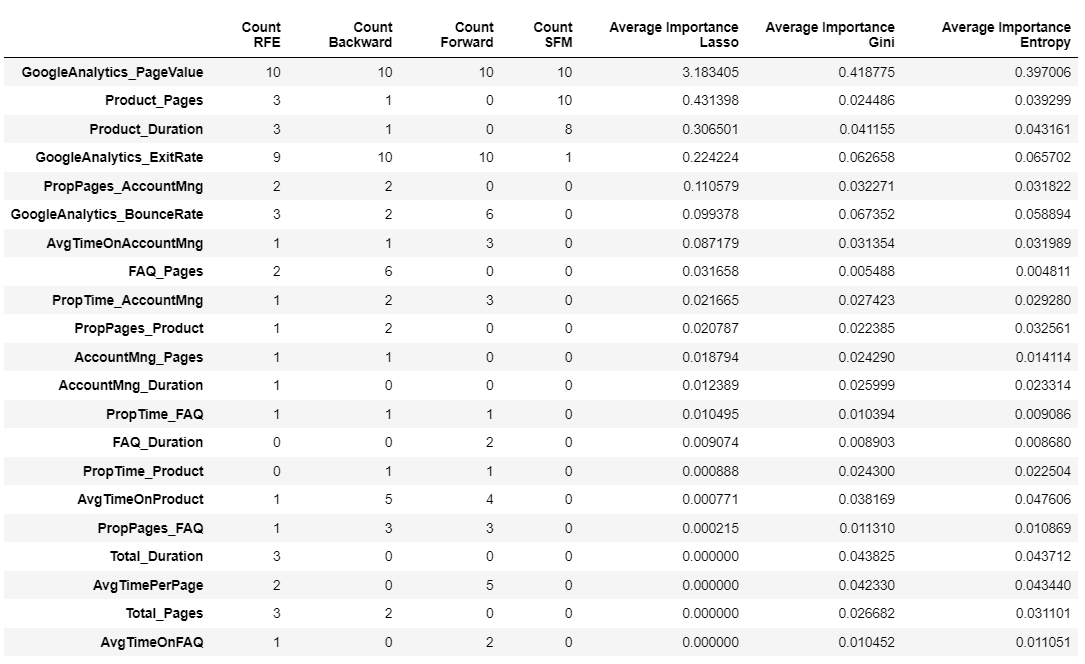

In [18]:
# Chi-Square for categorical data

fold = 1

for train_index, val_index in skf.split(data_non_metric, target):
        
        # Data Partition
        X_train, X_val = data_non_metric.iloc[train_index], data_non_metric.iloc[val_index]
        y_train, y_val = target.iloc[train_index], target.iloc[val_index]
        
        # CODE FOR Chi-Square
        if fold == 1:
            chi_square_results = pd.DataFrame(index = X_train.columns)
        
        importance_list = []
        
        for var in data_non_metric:
            
            dfObserved = pd.crosstab(y_train, X_train[var]) 
            chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
            dfExpected = pd.DataFrame(expected, columns = dfObserved.columns, index = dfObserved.index)

            if p < 0.05:
                importance_list.append(True)
            else: 
                importance_list.append(False)
            
        selected_features = pd.Series(importance_list, index = X_train.columns, name=f'Partition {fold}')    
      
        chi_square_results = pd.concat((chi_square_results, selected_features), axis=1)
        
        fold+=1
        
        
# Add new column with count of True's        
count_chi_square_list = []
for index, row in chi_square_results.iterrows():
    count = 0
    for elem in row:
        if elem == True:
            count+=1
    count_chi_square_list.append(count)

chi_square_results['Count'] = count_chi_square_list 

chi_square_results.sort_values(by='Count', ascending=False, inplace = True)

chi_square_results['Keep'] = chi_square_results['Count'].apply(lambda x: 'Yes' if x == 10 else 'No')
chi_square_results[chi_square_results['Keep'] == 'Yes']

,Partition 1,Partition 2,Partition 3,Partition 4,Partition 5,Partition 6,Partition 7,Partition 8,Partition 9,Partition 10,Count,Keep
Apple,True,True,True,True,True,True,True,True,True,True,10,Yes
Mar,True,True,True,True,True,True,True,True,True,True,10,Yes
Traffic_15,True,True,True,True,True,True,True,True,True,True,10,Yes
Windows,True,True,True,True,True,True,True,True,True,True,10,Yes
Traffic_13,True,True,True,True,True,True,True,True,True,True,10,Yes
Traffic_12,True,True,True,True,True,True,True,True,True,True,10,Yes
Traffic_8,True,True,True,True,True,True,True,True,True,True,10,Yes
Oct,True,True,True,True,True,True,True,True,True,True,10,Yes
Nov,True,True,True,True,True,True,True,True,True,True,10,Yes
Traffic_3,True,True,True,True,True,True,True,True,True,True,10,Yes


<a class="anchor" id="relevantfeat">

## 4.1) Choose the most relevant features

</a>

In [19]:
# Find the most important categorical features

kbest = SelectKBest(score_func = chi2, k=10)
kbest_fit = kbest.fit_transform(X = data_non_metric, y = target)
best = kbest.get_support()

indices = np.argsort(kbest.scores_)[::-1]

features = []
for i in range(10):
    features.append(data_non_metric.columns[indices[i]])

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.bar(features, kbest.scores_[indices[range(10)]], color='r', align='center')
plt.show()

# 10 Most important: Nov, Traffic_2, New_Access, Traffic_3, May, Traffic_13, Traffic_8, Mar, Apple, Feb

TypeError: The score function should be a callable, 1.1873426244251937 (<class 'numpy.float64'>) was passed.

In [77]:
selected_features = ['GoogleAnalytics_PageValue', 
                   'GoogleAnalytics_ExitRate', 
                   'Product_Pages',
                   'AvgTimeOnAccountMng', 
                   'PropPages_AccountMng',
                   'Traffic_13',
                   'Traffic_12',
                   'Traffic_8',
                   'Traffic_3',
                   'Traffic_2',
                   'Traffic_15',
                   'Apple',
                   'Windows',
                   'Returner',
                   'New_Access',
                   'Covid',
                   'Dec',
                   'Feb',
                   'May',
                   'Mar',
                   'Nov',
                   'Oct',
                  ]

data_selected_features = data[selected_features]
data_selected_features.shape

(9999, 22)

<a class="anchor" id="pca">

## 4.2) PCA Analysis

</a>

In [20]:
# ------------------- Principal Components Analysis ------------

# Perform PCA to reduce dimensionality and retain the best combinations of the most important variables

data_pca = data_metric_scaled.copy() # para confirmar
pca = PCA()
pca_feat = pca.fit_transform(data_pca)
pca_feat
pd.DataFrame({"Eigenvalue": pca.explained_variance_,
            "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
             "Proportion": pca.explained_variance_ratio_,
             "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
            index=range(1, pca.n_components_ + 1))

,Eigenvalue,Difference,Proportion,Cumulative
1,1.570635e-01,0.000000e+00,5.250117e-01,0.525012
2,7.989735e-02,-7.716618e-02,2.670705e-01,0.792082
3,1.750803e-02,-6.238932e-02,5.852358e-02,0.850606
4,1.226846e-02,-5.239568e-03,4.100943e-02,0.891615
5,9.419205e-03,-2.849256e-03,3.148530e-02,0.923101
6,5.094061e-03,-4.325143e-03,1.702777e-02,0.940128
7,3.937045e-03,-1.157017e-03,1.316024e-02,0.953289
8,2.828060e-03,-1.108985e-03,9.453273e-03,0.962742
9,2.539887e-03,-2.881725e-04,8.490007e-03,0.971232
10,2.478584e-03,-6.130372e-05,8.285089e-03,0.979517


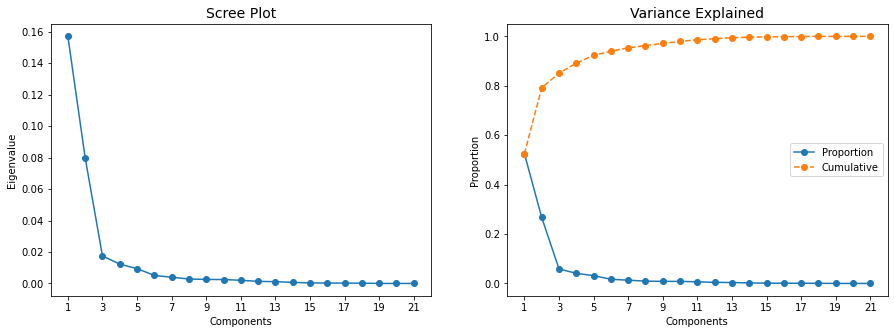

In [21]:
# Scree plot and variance explained plot

# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [22]:
# Perform PCA again with the number of principal components to retain based on the 3 criteria -> 3 PCs
pca = PCA(n_components=3)
pca_feat = pca.fit_transform(data_pca)
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=data_pca.index, columns=pca_feat_names)  # remember index=df_pca.index
display(pca_df)

# If we want to select the variables from PCA
data_selected_pca = pca_df.copy()

,PC0,PC1,PC2
0,-0.084985,-0.222917,-0.105156
1,-0.086026,-0.215208,-0.051192
2,-0.036112,-0.236783,-0.075976
3,-0.206432,-0.165804,-0.063709
4,-0.140121,-0.005190,0.101278
...,...,...,...
9994,-0.150500,0.153618,0.013956
9995,0.285304,1.285639,-0.277443
9996,-0.107491,-0.210356,-0.062330
9997,-0.110885,-0.203939,-0.014134


<a class="anchor" id="finalinsights">

## 4.3) Final Insights
    
</a>

<hr>

### Numerical Data

| Predictor | Spearman | RFE | Lasso | What to do? (One possible way to "solve") | 
| --- | --- | --- | --- |--- |
| AccountMng_Pages | Discard | Keep | Keep ?| Include in the model |
| AccountMng_Duration | Discard | Keep | Keep | Include in the model |
| FAQ_Pages | Discard | Discard | Keep | Try with and without |
| FAQ_Duration | Discard | Discard | Discard |  Discard |
| Product_Pages | Discard | Discard | Discard |  Discard |
| Product_Duration | Discard | Keep | Keep | Include in the model |
| GoogleAnalytics_BounceRate | Discard | Discard | Keep ? | Discard |
| GoogleAnalytics_ExitRate | Discard | Keep | Keep ?| Include in the model |
| GoogleAnalytics_PageValue | Discard | Keep | Keep | Include in the model |
| Total_Duration | Discard | Discard | Discard |  Discard |
| Total_Pages | Discard | Keep | Keep | Include in the model |
| PropTime_AccountMng | Discard | Discard | Discard |  Discard |
| PropTime_FAQ | Discard | Discard | Discard |  Discard |
| PropTime_Product | Discard | Keep | Keep | Include in the model |
| PropPages_AccountMng | Discard | Discard | Keep ? | Discard |
| PropPages_FAQ | Discard | Keep | Keep ?| Include in the model |
| PropPages_Product | Discard | Keep | Keep | Include in the model |
| AvgTimeOnAccountMng | Discard | Discard | Keep | Try with and without |
| AvgTimeOnFAQ | Discard | Discard | Keep | Try with and without |
| AvgTimeOnProduct | Discard | Discard | Keep | Try with and without |
| Month | Discard | Discard | Discard |  Discard | 


<hr>


### Categorical Data

| Predictor | Chi-Square | 
| --- | --- | 
| OS | Keep |  
| Country | Discard | 
| Type_of_Visitor | Keep |

<hr>

<a class="anchor" id="mdltrain">

# 5) Model Training
    
</a>

<a class="anchor" id="rungrids">

## 5.1) Function to run all grids
    
</a>

In [23]:
# def run_grid_fit_dataset(scaler, model, parameters):

#     # ---------- SCALE THE DATA_SELECTED-FEATURES ----------
#     #Separate data_selected_features in metric and non metric features
#     data_metric = data_selected_features.select_dtypes(include=np.number).set_index(data_selected_features.index)
#     data_non_metric = data_selected_features.select_dtypes(exclude=np.number).set_index(data_selected_features.index)

#     # -------------- Create a scalling method --------------       
#     data_metric_scaled = scaler.fit_transform(data_metric)
#     data_metric_scaled = pd.DataFrame(data_metric_scaled, columns = data_metric.columns).set_index(data_metric.index)  

#     # Join the metric and non metric variables back together
#     data_final = data_metric_scaled.join(data_non_metric)

    
#     # ---------- DEFINE OUR GRID SEARCH ----------
#     model_grid = GridSearchCV(estimator = model, param_grid = parameters, scoring='f1', n_jobs=-1,cv=4)
    
#     grid_search = model_grid.fit(data_final, target)

#     print(f'Best parameters= {grid_search.best_params_}')
#     print(f'Best score= {grid_search.best_score_}')
    

In [78]:
def run_grid_fit_train(scaler, model, parameters, do_scaling, random_state):
    
    X_train, X_val, y_train, y_val = train_test_split(data_selected_features, target, train_size=0.85, stratify = target, random_state=50)
    
    # Separate X_train in metric and non metric features
    X_train_metric = X_train.select_dtypes(include=np.number).set_index(X_train.index)
    X_train_non_metric = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)

    # Separate X_val in metric and non metric features
    X_val_metric = X_val.select_dtypes(include=np.number).set_index(X_val.index)
    X_val_non_metric = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)


    # Create a scalling method ------------------------------       
    scaler = scaler.fit(X_train_metric)

    # Scalling the X_train_metric
    X_train_metric_scaled = scaler.transform(X_train_metric) 
    X_train_metric_scaled = pd.DataFrame(X_train_metric_scaled, columns = X_train_metric.columns).set_index(X_train_metric.index)  

    # Scalling the X_val_metric
    X_val_metric_scaled = scaler.transform(X_val_metric) 
    X_val_metric_scaled = pd.DataFrame(X_val_metric_scaled, columns = X_val_metric.columns).set_index(X_val.index)

    # Join the metric and non metric variables back together
    X_train_final = X_train_metric_scaled.join(X_train_non_metric)
    X_val_final = X_val_metric_scaled.join(X_val_non_metric)

    
    # ---------- DEFINE OUR GRID SEARCH ----------
    model_grid = GridSearchCV(estimator = model, param_grid = parameters, scoring='f1', n_jobs=-1,cv=3)
    
    grid_search = model_grid.fit(X_train_final, y_train)

    print(f'Best parameters= {grid_search.best_params_}')
    print(f'Best score= {grid_search.best_score_}')
    

<a class="anchor" id="functperfor">

## 5.2) Function to the test the performance of the models
    
</a>

In [79]:
def avg_score(model, split_method, scaler_method, X, y, list_random_states, remove_outliers=False):
    
    score_train = []
    score_val = []
    # Will keep of track of which fold we are in
    fold = 1
    
    for train_index, test_index in split_method.split(X, y=target):
        
        # Data Partition
        X_train, X_val = X.iloc[train_index], X.iloc[test_index]
        y_train, y_val = y.iloc[train_index], y.iloc[test_index]
        
        
        # -------------------- REMOVE OUTLIERS --------------------
        if remove_outliers:
            
            # Join X and y training part
            X_y_train = X_train.join(y_train)
            
            iforest = IsolationForest(n_estimators=100, max_samples='auto', 
                              contamination=0.005, max_features=1.0, 
                              bootstrap=False, n_jobs=-1, random_state=1)
    
            # Returns 1 of inliers, -1 for outliers
            pred = iforest.fit_predict(X_train)
            
            # Extract outliers
            inlier_index = np.where(pred==1)
            
            X_y_train_filtered = X_y_train.iloc[inlier_index]   
            
            # Print percentage of outliers removed
            dif = X_y_train.shape[0] - X_y_train_filtered.shape[0]
            perc_outliers = np.round(dif / X_y_train.shape[0] * 100, 2)
            print(f'Percentage of outliers removed from KFold {fold}: {perc_outliers}% ({dif} observations)')
            
            
            # Define data as all the independent variables
            X_train = X_y_train_filtered.drop(['Buy'], axis=1)
            # Define target as the dependent variable
            y_train = X_y_train_filtered['Buy']
                                         
        # ------------------------------------------------------------------------------------------

        # Separate X_train in metric and non metric features
        X_train_metric = X_train.select_dtypes(include=np.number).set_index(X_train.index)
        X_train_non_metric = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)

        # Separate X_val in metric and non metric features
        X_val_metric = X_val.select_dtypes(include=np.number).set_index(X_val.index)
        X_val_non_metric = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)


        # Create a scaling method ------------------------------       
        scaler = scaler_method.fit(X_train_metric)

        # Scalling the X_train_metric
        X_train_metric_scaled = scaler.transform(X_train_metric) 
        X_train_metric_scaled = pd.DataFrame(X_train_metric_scaled, columns = X_train_metric.columns).set_index(X_train_metric.index)  

        # Scalling the X_val_metric
        X_val_metric_scaled = scaler.transform(X_val_metric) 
        X_val_metric_scaled = pd.DataFrame(X_val_metric_scaled, columns = X_val_metric.columns).set_index(X_val.index)


        # Join the metric and non metric variables back together
        X_train_final = X_train_metric_scaled.join(X_train_non_metric)
        X_val_final = X_val_metric_scaled.join(X_val_non_metric)     


        # Define our model and fit to our scalled data ------------------------------
        model = model.fit(X_train_final, y_train) 


        # Predict the dependent variable
        y_train_pred = model.predict(X_train_final)
        y_val_pred = model.predict(X_val_final)

        # Calculate de f1 score
        value_train = f1_score(y_train, y_train_pred)
        value_val = f1_score(y_val, y_val_pred)        

        # Append results to the lists created above
        score_train.append(value_train)
        score_val.append(value_val)
        fold+=1

                                         
    # Print the results  
    print('\nAverage score of Train:', round(np.mean(score_train), 5))
    print('Average score of Valid:', round(np.mean(score_val), 5))
    print(f'Difference between Train and Validation: {round(np.mean(score_train)-np.mean(score_val), 5)}')

<a class="anchor" id="modeltest">

## 5.3) Models to test
    
</a>

In [80]:
skf = StratifiedKFold(n_splits=10)

# ---------- MINMAX SCALER ----------
min_max = MinMaxScaler()
min_max2 = MinMaxScaler(feature_range = (-1,1))

# ---------- STANDARD SCALER ----------
standard_scaler = StandardScaler()

# ---------- ROBUST SCALER ----------
robust_scaler = RobustScaler()


# LIST WITH ALL SCALLING METHODS
scalling = [min_max, min_max2, standard_scaler, robust_scaler]

<a class="anchor" id="dt">

### 5.3.1) Decision Tree
    
</a>

In [243]:
scaler_dt = min_max2
model_dt = DecisionTreeClassifier()
param_dt = {
    'criterion': ['gini', 'entropy'], 
    'splitter': ['best', 'random'],
    'max_depth': [4,5,6,7],
    'min_samples_split': [200,300],
    'min_samples_leaf': [200,300],
#    'min_weight_fraction_leaf': [0.0],
    'max_features': [2,4,6, None],
#   'random_state'=None,
    'max_leaf_nodes': [4,8, None],
#    'min_impurity_decrease'=0.0,
#    'min_impurity_split'=None,
#    'class_weight'=None,
#    'ccp_alpha'=0.0,
    }

# ------------------------------------------
run_grid_fit_dataset(scaler_dt, model_dt, param_dt)

Best parameters= {'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 200, 'min_samples_split': 200, 'splitter': 'best'}
Best score= 0.6647365633980563


In [220]:
model_dt = DecisionTreeClassifier(    
        criterion='entropy',
        max_depth= 4, 
        max_features= None,
        splitter='best',
        max_leaf_nodes= None,
        min_samples_leaf= 200,
        min_samples_split= 200,
        )

# -------------------------------------------------------------------------------------------
for scale in scalling:
    print(f'\n----- Score with {scale} -----')
    avg_score(model_dt, skf, scale, data_selected_features, target, remove_outliers=False)
    
#avg_score(model_dt, skf, min_max2, data_selected_features, target, remove_outliers=False)


----- Score with MinMaxScaler() -----


TypeError: avg_score() missing 1 required positional argument: 'list_random_states'

<a class="anchor" id="nn">

### 5.3.2) Neural Network
    
</a>

In [247]:
scaler_nn = min_max2
model_nn = MLPClassifier()
param_nn = {
    'hidden_layer_sizes': [(8),(6),(4),(6,3),(8,4),(8,4,2)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'max_iter' : [100,200],
}


# ------------------------------------------
run_grid_fit_dataset(scaler_nn, model_nn, param_nn)

Best parameters= {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (8, 4, 2), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}
Best score= 0.6345572786447906


In [221]:
model_nn = MLPClassifier(
    hidden_layer_sizes=(8),
    activation='relu',
#    *,
    solver='adam',
    alpha=0.001,
    batch_size='auto',
    learning_rate='constant',
#    learning_rate_init=0.001,
#    power_t=0.5,
    max_iter=100,
#    shuffle=True,
#    random_state=None,
#    tol=0.0001,
#    verbose=False,
)

# -------------------------------------------------------------------------------------------
for scale in scalling:
    print(f'\n----- Score with {scale} -----')
    avg_score(model_nn, skf, scale, data_selected_features, target, remove_outliers=False)


----- Score with MinMaxScaler() -----


TypeError: avg_score() missing 1 required positional argument: 'list_random_states'

<a class="anchor" id="knn">

### 5.3.3) K-Nearest neighbors
    
</a>

In [219]:
# --------------- KNN ---------------
model_KNN = KNeighborsClassifier(
#    n_neighbors=5,
#    *,
    weights='uniform',
#    algorithm='auto',
#    leaf_size=30,
#    p=2,
#    metric='minkowski',
#    metric_params=None,
#    n_jobs=None,
    )


<a class="anchor" id="nb">

### 5.3.4) Naive Bayes
    
</a>

<a class="anchor" id="svm">

### 5.3.5) Support Vector Machines
    
</a>

<a class="anchor" id="rc">

### 5.3.6) Ridge Classifier
    
</a>

<a class="anchor" id="em">

### 5.3.7) Ensemble Methods
    
</a>

<a class="anchor" id="b">

#### 5.3.7.1) Bagging meta-estimator
    
</a>

In [ ]:
scaler_b = min_max2
model_b = BaggingClassifier()

param_b = {
    'n_estimators': [100,200,250,300],
    'max_samples': [0.2,0.4,0.6,0.8,1.0],
    'max_features': [0.6,0.8,1.0],
}

run_grid_fit_dataset(scaler_b,model_b,param_b)

In [218]:
bagging = BaggingClassifier(
    max_features = 1.0,
    max_samples = 0.2,
    n_estimators = 200
)

# -------------------------------------------------------------------------------------------
for scale in scalling:
    print(f'\n----- Score with {scale} -----')
    avg_score(model_b, skf, scale, data_selected_features, target, remove_outliers=False)
    
#avg_score(model_gb, skf, standard_scaler, data_selected_features, target, remove_outliers=False)


----- Score with MinMaxScaler() -----


NameError: name 'model_b' is not defined

<a class="anchor" id="rf">

#### 5.3.7.2) Random Forest
    
</a>

In [ ]:
scaler_rf = min_max2
model_rf = RandomForestClassifier()

param_rf = {
    'n_estimators': [100,200,250,300],
    'bootstrap': [True],
    'max_samples': [0.6,0.8,None],
    'max_depth': [6,8,10,None],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy'],
    
}

run_grid_fit_dataset(scaler_rf,model_rf,param_rf)

In [ ]:
Random_forest = RandomForestClassifier(
    bootstrap = True,
    criterion = 'entropy',
    max_depth = 10,
    max_features = 'log2',
    max_samples = 0.8,
    n_estimators = 200,
)

# -------------------------------------------------------------------------------------------
for scale in scalling:
    print(f'\n----- Score with {scale} -----')
    avg_score(model_rf, skf, scale, data_selected_features, target, remove_outliers=False)
    
#avg_score(model_gb, skf, standard_scaler, data_selected_features, target, remove_outliers=False)

<a class="anchor" id="ert">

#### 5.3.7.3) Extremely Randomized Trees
    
</a> 

In [ ]:
scaler_erf = min_max2
model_erf = ExtraTreesClassifier()

param_erf = {
    'n_estimators': [100,200,250,300],
    'max_samples': [0.8,None],
    'max_depth': [6,8,10,None],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy'],
}

run_grid_fit_dataset(scaler_erf,model_erf,param_erf)

In [217]:
Extremely_Randomized_Trees = ExtraTreesClassifier(
    criterion = 'entropy',
    max_depth = None,
    max_features = 'auto',
    max_samples = 0.8,
    n_estimators = 200
)

# -------------------------------------------------------------------------------------------
for scale in scalling:
    print(f'\n----- Score with {scale} -----')
    avg_score(model_erf, skf, scale, data_selected_features, target, remove_outliers=False)
    
#avg_score(model_gb, skf, standard_scaler, data_selected_features, target, remove_outliers=False)


----- Score with MinMaxScaler() -----


NameError: name 'model_erf' is not defined

<a class="anchor" id="ada">

#### 5.3.7.4) ADA Boost
    
</a>

In [ ]:
scaler_ada = min_max2
model_ada = AdaBoostClassifier()

param_ada = {
    'n_estimators': [30,50,70,90,100,150],
    'learning_rate': [0.2,0.4,0.6,0.8,1.0]
}

run_grid_fit_dataset(scaler_ada,model_ada,param_ada)

In [ ]:
ADABoost = AdaBoostClassifier(
    n_estimators = 50,
    learning_rate = 0.2
)

# -------------------------------------------------------------------------------------------
for scale in scalling:
    print(f'\n----- Score with {scale} -----')
    avg_score(model_ada, skf, scale, data_selected_features, target, remove_outliers=False)
    
#avg_score(model_gb, skf, standard_scaler, data_selected_features, target, remove_outliers=False)

<a class="anchor" id="hgb">

#### 5.3.7.5) Histogram-Based Gradient Boosting
    
</a> 

In [ ]:
scaler_hgb = min_max
model_hgb = HistGradientBoostingClassifier()

param_hgb = {
    'learning_rate' : [0.06,0.07,0.08,0.09,0.1],
    'min_samples_leaf' : [125,135,145,155,165,175],
    'max_leaf_nodes': [12,14,16,18,20,22],
    'warm_start':[True]
}

run_grid_fit_dataset(scaler_hgb,model_hgb,param_hgb)

In [ ]:
HistogramGradBoost = HistGradientBoostingClassifier(
    learning_rate = 0.09,
    max_leaf_nodes = 14,
    min_samples_leaf = 145,
    warm_start = True
)

# -------------------------------------------------------------------------------------------
for scale in scalling:
    print(f'\n----- Score with {scale} -----')
    avg_score(model_hgb, skf, scale, data_selected_features, target, remove_outliers=False)
    
#avg_score(model_gb, skf, standard_scaler, data_selected_features, target, remove_outliers=False)

In [27]:
model_hgb = HistGradientBoostingClassifier()

param_hgb = {
    'loss' : ['auto'],
    'learning_rate' : [0.05,0.1,0.15],
    'min_samples_leaf' : [100,200,300],
    'max_leaf_nodes': [12,14,16,18],
    'warm_start':[True],
    'max_iter' : [60,80],
    'max_depth' : [6,8,10]
}


random_state = 66
X_train, X_val, y_train, y_val = train_test_split(data_selected_features, target, train_size=0.85, stratify = target, random_state=random_state)

model_grid = GridSearchCV(estimator = model_hgb, param_grid = param_hgb, scoring='f1', n_jobs=-1,cv=3)

# grid_search = model_grid.fit(data_selected_features, target)
grid_search = model_grid.fit(X_train, y_train)

print(f'Best parameters = {grid_search.best_params_}')
print(f'Best score = {grid_search.best_score_}')

NameError: name 'data_selected_features' is not defined

In [81]:
HistogramGradBoost = HistGradientBoostingClassifier(
    random_state = None,
    learning_rate = 0.15,
    min_samples_leaf = 200,
    max_leaf_nodes = 16,
    warm_start = True,
    loss='auto',
    max_iter= 60,
    max_depth=7 
)
#     l2_regularization=0.0,
#     max_bins=255,
#     categorical_features=None,
#     monotonic_cst=None,
#     early_stopping='auto',
#     scoring='loss',
#     validation_fraction=0.1,
#     n_iter_no_change=10,
#     tol=1e-07,
#     verbose=0,


# random_state = 66
# X_train, X_val, y_train, y_val = train_test_split(data_selected_features, target, train_size=0.85, stratify = target, random_state=random_state)
model = HistogramGradBoost.fit(X_train, y_train)

# Predict the dependent variable
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Calculate de f1 score
value_train = f1_score(y_train, y_train_pred)
value_val = f1_score(y_val, y_val_pred)

# Print the results  
print('Score of Train:', round(np.mean(value_train), 5))
print('Score of Valid:', round(np.mean(value_val), 5))
print(f'Difference between Train and Validation: {round(np.mean(value_train)-np.mean(value_val), 5)}')

Score of Train: 0.71489
Score of Valid: 0.65036
Difference between Train and Validation: 0.06453


##### Iterate over random states

In [32]:
# model_hgb = HistGradientBoostingClassifier()

# param_hgb = {
#     'learning_rate' : [0.1,0,15],
#     'min_samples_leaf' : [100,150,200],
#     'max_leaf_nodes': [14,15,16],
#     'max_iter' : [60,70,80],
#     'max_depth' : [5,6,7]
# }

# random_state_list = [81,82,83]

# for random_state in random_state_list: 
#     X_train, X_val, y_train, y_val = train_test_split(data_selected_features, target, train_size=0.85, stratify = target, random_state=random_state)

#     model_grid = GridSearchCV(estimator = model_hgb, param_grid = param_hgb, scoring='f1', n_jobs=-1,cv=3)

#     grid_search = model_grid.fit(X_train, y_train)

#     print(f'Best parameters = {grid_search.best_params_}')
#     print(f'Best score = {grid_search.best_score_}')   
    
#     HistogramGradBoost = HistGradientBoostingClassifier(
#                     random_state = None,
#                     learning_rate = grid_search.best_params_['learning_rate'],
#                     min_samples_leaf = grid_search.best_params_['min_samples_leaf'],
#                     max_leaf_nodes = grid_search.best_params_['max_leaf_nodes'],
#                     warm_start = True,
#                     max_iter=grid_search.best_params_['max_iter'],
#                     max_depth=grid_search.best_params_['max_depth']
#                 )
    
#     model = HistogramGradBoost.fit(X_train, y_train)

#     # Predict the dependent variable
#     y_train_pred = model.predict(X_train)
#     y_val_pred = model.predict(X_val)

#     # Calculate de f1 score
#     value_train = f1_score(y_train, y_train_pred)
#     value_val = f1_score(y_val, y_val_pred)

#     # Print the results  
#     print('\nScore of Train:', round(np.mean(value_train), 5))
#     print('Score of Valid:', round(np.mean(value_val), 5))
#     print(f'Difference between Train and Validation: {round(np.mean(value_train)-np.mean(value_val), 5)}\n')
#     print('----------------------------------------------------------------------------------------------------')

Best parameters = {'learning_rate': 0.1, 'max_depth': 6, 'max_iter': 80, 'max_leaf_nodes': 15, 'min_samples_leaf': 150}
Best score = 0.6669045836177463

Score of Train: 0.71675
Score of Valid: 0.66667
Difference between Train and Validation: 0.05008

----------------------------------------------------------------------------------------------------
Best parameters = {'learning_rate': 0.1, 'max_depth': 6, 'max_iter': 60, 'max_leaf_nodes': 14, 'min_samples_leaf': 150}
Best score = 0.660993702825272

Score of Train: 0.69061
Score of Valid: 0.72566
Difference between Train and Validation: -0.03506

----------------------------------------------------------------------------------------------------
Best parameters = {'learning_rate': 0.1, 'max_depth': 5, 'max_iter': 70, 'max_leaf_nodes': 16, 'min_samples_leaf': 150}
Best score = 0.6578383032270656

Score of Train: 0.70295
Score of Valid: 0.66986
Difference between Train and Validation: 0.03309

---------------------------------------------

In [305]:
HistogramGradBoost = HistGradientBoostingClassifier(
    random_state = None,
    learning_rate = 0.07,
    min_samples_leaf = 100,
    max_leaf_nodes = 11,
    warm_start = True,
    #loss='binary_crossentropy',
    #max_iter= 70,
    #max_depth=6
)

HistogramGradBoost = HistGradientBoostingClassifier(
    random_state = None,
    learning_rate = 0.09,
    min_samples_leaf = 100,
    max_leaf_nodes = 11,
    warm_start = True,
    loss='binary_crossentropy',
    max_iter= 70,
    #max_depth=7
)

score_train = []
score_val = []
overfit = []
fold = 1

for train_index, test_index in skf.split(data_selected_features,target):

    # Data Partition
    X_train, X_val = data_selected_features.iloc[train_index], data_selected_features.iloc[test_index]
    y_train, y_val = target.iloc[train_index], target.iloc[test_index]
    
    model = HistogramGradBoost.fit(X_train, y_train)

    # Predict the dependent variable
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Calculate de f1 score
    value_train = f1_score(y_train, y_train_pred)
    value_val = f1_score(y_val, y_val_pred)
    
    print(f'### Fold {fold} ###')
    print(f'Train: {round(value_train,5)}')
    print(f'Valid: {round(value_val,5)}')
    print(f'Overfit: {np.abs(round(value_train-value_val,5))}')
    print('----------------')
    
    # Append results to the lists created above
    score_train.append(value_train)
    score_val.append(value_val)
    overfit.append(np.abs(round(value_train-value_val,5)))
    
    fold+=1
                                         
# Print the results  
print('\nAverage score of Train:', round(np.mean(score_train), 5))
print('Average score of Valid:', round(np.mean(score_val), 5))
print(f'Average of overfit: {round(np.mean(overfit), 5)}')

### Fold 1 ###
Train: 0.70264
Valid: 0.67376
Overfit: 0.02888
----------------
### Fold 2 ###
Train: 0.69657
Valid: 0.72789
Overfit: 0.03132
----------------
### Fold 3 ###
Train: 0.69922
Valid: 0.7047
Overfit: 0.00548
----------------
### Fold 4 ###
Train: 0.70524
Valid: 0.65018
Overfit: 0.05507
----------------
### Fold 5 ###
Train: 0.70151
Valid: 0.68364
Overfit: 0.01787
----------------
### Fold 6 ###
Train: 0.70085
Valid: 0.69014
Overfit: 0.01071
----------------
### Fold 7 ###
Train: 0.69903
Valid: 0.70671
Overfit: 0.00768
----------------
### Fold 8 ###
Train: 0.69708
Valid: 0.72355
Overfit: 0.02647
----------------
### Fold 9 ###
Train: 0.69865
Valid: 0.71062
Overfit: 0.01198
----------------
### Fold 10 ###
Train: 0.69708
Valid: 0.72355
Overfit: 0.02647
----------------

Average score of Train: 0.69979
Average score of Valid: 0.69947
Average of overfit: 0.02219


<a class="anchor" id="vc">

#### 5.3.7.6) Voting Classifier
    
</a> 

In [ ]:
estimators = [('gb',GradientBoostingClassifier(learning_rate=0.25, loss='exponential', max_depth=5,
                                               max_features='log2', min_samples_leaf=500,min_samples_split=500,
                                               n_estimators=200,random_state=10, subsample=0.7),
              'hgb',HistGradientBoostingClassifier(learning_rate = 0.07,max_leaf_nodes = 11,min_samples_leaf = 100,
                                                   warm_start = True))]

In [ ]:
voting_soft = VotingClassifier(estimators = estimators, voting = 'soft')
voting_hard = VotingClassifier(estimators = estimators, voting = 'hard')

# POR ACABAR

<a class="anchor" id="gb">

#### 5.3.7.7) Gradient Boost
    
</a> 

In [110]:
model_gb = GradientBoostingClassifier()

param_gb = {'max_depth': [8,10], 
            'min_samples_split': [500,600],
            'min_samples_leaf' : [500,600],
            'n_estimators' : [150,200,250],
            'learning_rate' : [0.08,0.1],
            'max_features': ['log2', 'sqrt'],
            'subsample': [0.8] }


random_state = 77
X_train, X_val, y_train, y_val = train_test_split(data_selected_features, target, train_size=0.85, stratify = target, random_state=random_state)

model_grid = GridSearchCV(estimator = model_gb, param_grid = param_gb, scoring='f1', n_jobs=-1,cv=4)

# grid_search = model_grid.fit(data_selected_features, target)
grid_search = model_grid.fit(X_train, y_train)

print(f'Best parameters = {grid_search.best_params_}')
print(f'Best score = {grid_search.best_score_}')

Best parameters = {'learning_rate': 0.1, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 600, 'min_samples_split': 500, 'n_estimators': 250, 'subsample': 0.8}
Best score = 0.6593506958608794


In [39]:
gradient_boost = GradientBoostingClassifier(
        #    loss='deviance',
            learning_rate=0.12,
            n_estimators=250,
            subsample= 0.8,
        #    criterion='friedman_mse',
            min_samples_split= 600,
            min_samples_leaf= 500,
        #    min_weight_fraction_leaf=0.0,
            max_depth= 6,
        #    min_impurity_decrease=0.0,
        #    min_impurity_split=None,
        #    init=None,
            random_state=None,
            max_features='sqrt',
        #    verbose=0,
        #    max_leaf_nodes=None,
        #    warm_start=False,
    
        #    validation_fraction=0.1,
        #    n_iter_no_change=None,
        #    tol=0.0001,
        #   ccp_alpha=0.0,
            )


X_train, X_val, y_train, y_val = train_test_split(data_selected_features, target, train_size=0.85, stratify = target, random_state=random_state)

model = gradient_boost.fit(X_train, y_train)

# Predict the dependent variable
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Calculate de f1 score
value_train = f1_score(y_train, y_train_pred)
value_val = f1_score(y_val, y_val_pred)

# Print the results  
print('Score of Train:', round(np.mean(value_train), 5))
print('Score of Valid:', round(np.mean(value_val), 5))
print(f'Difference between Train and Validation: {round(np.mean(value_train)-np.mean(value_val), 5)}')

Score of Train: 0.70061
Score of Valid: 0.67453
Difference between Train and Validation: 0.02608


In [137]:
from matplotlib.legend_handler import HandlerLine2D
random_state=None

def calculate_f1(interval, x_train, x_test, y_train, y_test, parameter):
    
    train_results = []
    test_results = []
    
    for value in interval:
        if parameter == 'Number of estimators':
            dt = GradientBoostingClassifier(n_estimators = value, random_state = random_state, subsample= 0.8,
                                            min_samples_split= 600, min_samples_leaf= 500, max_features='sqrt')
        elif parameter == 'Learning Rate':
            dt = GradientBoostingClassifier(learning_rate = value, random_state = random_state, subsample= 0.8,
                                            min_samples_split= 600, min_samples_leaf= 500, max_features='sqrt')
            
        dt.fit(x_train, y_train)
        train_results.append(f1_score(y_train,dt.predict(x_train),average="micro"))
        test_results.append(f1_score(y_test,dt.predict(x_test), average="micro"))
        
    value_train = train_results.index(max(train_results))
    value_test = test_results.index(max(test_results))
    
    print('The best train value is: ',interval[value_train])
    print('The best test value is: ',interval[value_test])

    fig = plt.figure(figsize = (16,10))
    line1, = plt.plot(interval, train_results, '#515C60', label="Train F1", linewidth=3)
    line2, = plt.plot(interval, test_results, '#C7DC1F', label="Test F1", linewidth=3)
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel("F1 score")
    plt.xlabel(str(parameter))
    plt.show()

In [138]:
X_train, X_val, y_train, y_val = train_test_split(data_selected_features, target, train_size=0.75, 
                                                  stratify = target, random_state=None)

The best train value is:  267
The best test value is:  280


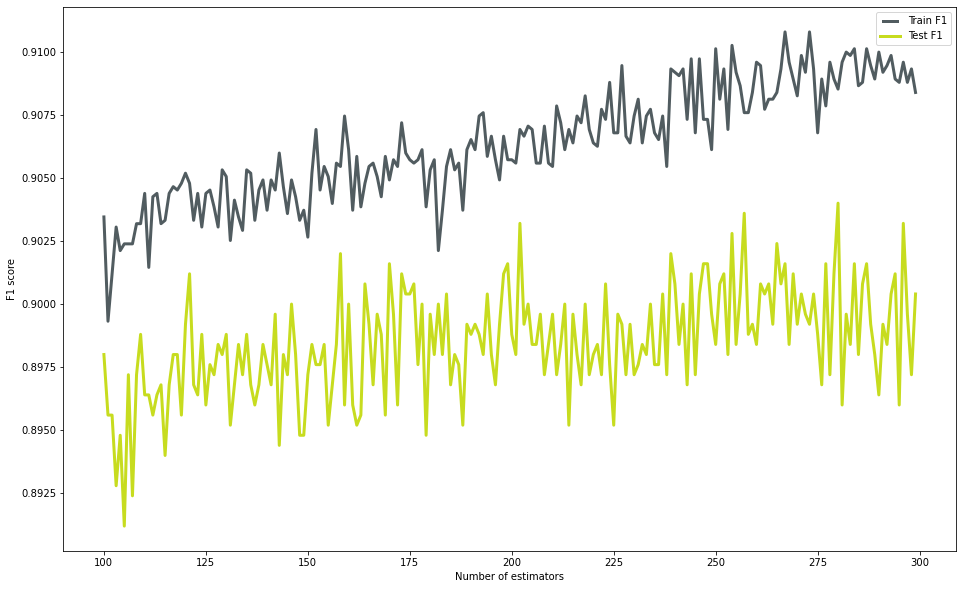

In [139]:
num_estimators = list(range(100,300))
calculate_f1(num_estimators, X_train, X_val, y_train, y_val,'Number of estimators')

The best train value is:  0.5
The best test value is:  0.3775


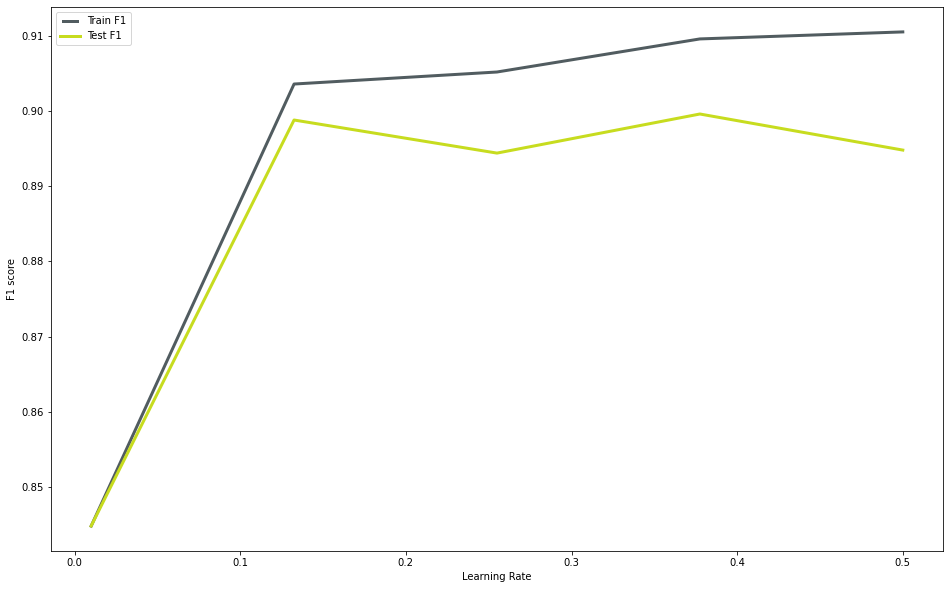

In [140]:
learning_rate = list(np.linspace(0.01, 0.5, 5, endpoint=True))
calculate_f1(learning_rate, X_train, X_val, y_train, y_val,'Learning Rate')

<a class="anchor" id="s">

#### 5.3.7.8) Stacking
    
</a> 

In [ ]:
# lr = LogisticRegression(random_state = 10).fit(X_train, y_train)
# nb = GaussianNB().fit(X_train, y_train)
# kn = KNeighborsClassifier().fit(X_train, y_train)
# dt = DecisionTreeClassifier(max_depth = 3, random_state = 10).fit(X_train, y_train)
# nn = MLPClassifier(max_iter = 5000, random_state = 10).fit(X_train, y_train)
# bg = BaggingClassifier(random_state = 10).fit(X_train, y_train)
# ab = AdaBoostClassifier(random_state = 10).fit(X_train, y_train)
# rf = RandomForestClassifier(random_state = 10).fit(X_train, y_train)
# gb = GradientBoostingClassifier(random_state = 10).fit(X_train, y_train)

In [ ]:
# accuracies = [f1_score(y_val, lr.predict(X_val)), 
#               f1_score(y_val, nb.predict(X_val)), 
#               f1_score(y_val, kn.predict(X_val)),
#               f1_score(y_val, dt.predict(X_val)), 
#               f1_score(y_val, nn.predict(X_val)), 
#               f1_score(y_val, bg.predict(X_val)),
#               f1_score(y_val, ab.predict(X_val)), 
#               f1_score(y_val, rf.predict(X_val)), 
#               f1_score(y_val, gb.predict(X_val))]

# models = ['lr','nb','kn','dt','nn','bg','ab','rf','gb']

# data_tuples = list(zip(models,accuracies))
# data = pd.DataFrame(data_tuples)
# data = data.sort_values(1)
# plt.bar(data[0], data[1])
# plt.ylim(0.60,0.7)
# plt.show()

In [311]:
# Apply stacking to the best two models
estimators = [('hgb', HistGradientBoostingClassifier(
                            random_state = None,
                            learning_rate = 0.07,
                            min_samples_leaf = 100,
                            max_leaf_nodes = 11,
                            warm_start = True,
                            #loss='binary_crossentropy',
                            #max_iter= 70,
                            #max_depth=6
                        )),
              ('hgb2', HistGradientBoostingClassifier(
                            random_state = None,
                            learning_rate = 0.09,
                            min_samples_leaf = 100,
                            max_leaf_nodes = 11,
                            warm_start = True,
                            loss='binary_crossentropy',
                            max_iter= 70,
                            #max_depth=7
                        ))]


random_state = 0
X_train, X_val, y_train, y_val = train_test_split(data_selected_features, target, train_size=0.80, stratify = target, random_state=random_state)

###########################################################################################################
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()).fit(X_train, y_train)
###########################################################################################################

# Predict the dependent variable
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Calculate de f1 score
value_train = f1_score(y_train, y_train_pred)
value_val = f1_score(y_val, y_val_pred)

# Print the results  
print('\nScore of Train:', round(np.mean(value_train), 5))
print('Score of Valid:', round(np.mean(value_val), 5))
print(f'Difference between Train and Validation: {round(np.mean(value_train)-np.mean(value_val), 5)}\n')
print('----------------------------------------------------------------------------------------------------')


Score of Train: 0.69763
Score of Valid: 0.70833
Difference between Train and Validation: -0.0107

----------------------------------------------------------------------------------------------------


In [ ]:
# Plot the histogram again

# accuracies = [f1_score(y_val, lr.predict(X_val)), 
#               f1_score(y_val, nb.predict(X_val)), 
#               f1_score(y_val, kn.predict(X_val)),
#               f1_score(y_val, dt.predict(X_val)), 
#               f1_score(y_val, nn.predict(X_val)), 
#               f1_score(y_val, bg.predict(X_val)),
#               f1_score(y_val, ab.predict(X_val)), 
#               f1_score(y_val, rf.predict(X_val)), 
#               f1_score(y_val, gb.predict(X_val))]

# models = ['lr','nb','kn','dt','nn','bg','ab','rf','gb']

# data_tuples = list(zip(models,accuracies))
# data = pd.DataFrame(data_tuples)
# data = data.sort_values(1)
# plt.bar(data[0], data[1])
# plt.ylim(0.60,0.7)
# plt.show()

<a class="anchor" id="best">

### 5.3.8) Choose the Best Model and the Best Scalling Method
    
</a> 

In [312]:
best_model = stacking
best_scalling = min_max2

In [314]:
# Apply best_model and best_scalling to the dataset with the selected features
random_state=0
X_train, X_val, y_train, y_val = train_test_split(data_selected_features, target, train_size=0.8, stratify = target, random_state=random_state)

# Define our model and fit to our scalled data
best_model_fitted = best_model.fit(X_train,y_train) ###########

# Predict the dependent variable
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)

# Calculate de f1 score
value_train = f1_score(y_train, y_train_pred)
value_val = f1_score(y_val, y_val_pred) 


print('------------ FINAL MODEL ------------')
print('Average score of Train:', round(np.mean(value_train), 5))
print('Average score of Valid:', round(np.mean(value_val), 5))
print(f'Difference between Train and Validation: {round(np.mean(value_train)-np.mean(value_val), 5)}')

------------ FINAL MODEL ------------
Average score of Train: 0.70421
Average score of Valid: 0.67135
Difference between Train and Validation: 0.03286


#### Apply this to a train/test split

In [307]:
# Apply best_model and best_scalling to the dataset with the selected features
remove_outliers = False
scale = False
#random_state = 50 # O que é que isto faz ??? Define que fracao vai para train e para validation

X_train, X_val, y_train, y_val = train_test_split(data_selected_features, target, train_size=0.75, stratify = target, random_state=0)


# -------------------- REMOVE OUTLIERS --------------------
if remove_outliers:

    # Join X and y training part
    X_y_train = X_train.join(y_train)

    iforest = IsolationForest(n_estimators=100, max_samples='auto', 
                      contamination=0.005, max_features=1.0, 
                      bootstrap=False, n_jobs=-1, random_state=1)

    # Returns 1 of inliers, -1 for outliers
    pred = iforest.fit_predict(X_train)

    # Extract outliers
    inlier_index = np.where(pred==1)

    X_y_train_filtered = X_y_train.iloc[inlier_index]   

    # Print percentage of outliers removed
    dif = X_y_train.shape[0] - X_y_train_filtered.shape[0]
    perc_outliers = np.round(dif / X_y_train.shape[0] * 100, 2)
    print(f'Percentage of outliers removed: {perc_outliers}% ({dif} observations)')


    # Define data as all the independent variables
    X_train = X_y_train_filtered.drop(['Buy'], axis=1)
    # Define target as the dependent variable
    y_train = X_y_train_filtered['Buy']

# ------------------------------------------------------------------------------------------

if scale:
    # Separate X_train in metric and non metric features
    X_train_metric = X_train.select_dtypes(include=np.number).set_index(X_train.index)
    X_train_non_metric = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)


    # Separate X_val in metric and non metric features
    X_val_metric = X_val.select_dtypes(include=np.number).set_index(X_val.index)
    X_val_non_metric = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)


    # Create a scalling method        
    best_scaler = best_scalling.fit(X_train_metric)

    # Scalling the X_train_metric
    X_train_metric_scaled = best_scaler.transform(X_train_metric) 
    X_train_metric_scaled = pd.DataFrame(X_train_metric_scaled, columns = X_train_metric.columns).set_index(X_train_metric.index)

    # Scalling the X_val_metric
    X_val_metric_scaled = best_scaler.transform(X_val_metric) 
    X_val_metric_scaled = pd.DataFrame(X_val_metric_scaled, columns = X_val_metric.columns).set_index(X_val.index)


    # Join the X_train and X_val back together
    X_train = X_train_metric_scaled.join(X_train_non_metric)
    X_val = X_val_metric_scaled.join(X_val_non_metric)     


# Define our model and fit to our scalled data
best_model_fitted = best_model.fit(X_train, y_train)


# Predict the dependent variable
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)

# Calculate de f1 score
value_train = f1_score(y_train, y_train_pred)
value_val = f1_score(y_val, y_val_pred) 


print('------------ FINAL MODEL ------------')
print('Average score of Train:', round(np.mean(value_train), 5))
print('Average score of Valid:', round(np.mean(value_val), 5))
print(f'Difference between Train and Validation: {round(np.mean(value_train)-np.mean(value_val), 5)}')

------------ FINAL MODEL ------------
Average score of Train: 0.69776
Average score of Valid: 0.70588
Difference between Train and Validation: -0.00812


#### Apply this to the entire dataset

In [315]:
# Apply best_model and best_scalling to the dataset with the selected features
remove_outliers = False
scale = False

# -------------------- REMOVE OUTLIERS --------------------
if remove_outliers:

    # Join X and y training part
    all_dataset = data_selected_features.join(target)

    iforest = IsolationForest(n_estimators=100, max_samples='auto', 
                      contamination=0.005, max_features=1.0, 
                      bootstrap=False, n_jobs=-1, random_state=1)

    # Returns 1 of inliers, -1 for outliers
    pred = iforest.fit_predict(X_train)

    # Extract outliers
    inlier_index = np.where(pred==1)

    all_dataset_filtered = all_dataset.iloc[inlier_index]   

    # Print percentage of outliers removed
    dif = all_dataset.shape[0] - all_dataset_filtered.shape[0]
    perc_outliers = np.round(dif / all_dataset.shape[0] * 100, 2)
    print(f'Percentage of outliers removed: {perc_outliers}% ({dif} observations)')


    # Define data as all the independent variabless
    data_selected_features = all_dataset_filtered.drop(['Buy'], axis=1)
    # Define target as the dependent variable
    target = all_dataset_filtered['Buy']


if scale:
    # ---------- SCALE THE DATA_SELECTED-FEATURES ----------
    #Separate data_selected_features in metric and non metric features
    data_metric = data_selected_features.select_dtypes(include=np.number).set_index(data_selected_features.index)
    data_non_metric = data_selected_features.select_dtypes(exclude=np.number).set_index(data_selected_features.index)

    # -------------- Create a scalling method --------------       
    data_metric_scaled = best_scalling.fit_transform(data_metric) #############
    data_metric_scaled = pd.DataFrame(data_metric_scaled, columns = data_metric.columns).set_index(data_metric.index)  

    # Join the metric and non metric variables back together
    data_selected_features = data_metric_scaled.join(data_non_metric)   


# Define our model and fit to our scalled data
best_model_fitted = best_model.fit(data_selected_features, target) #############

# Predict the dependent variable
predictions = best_model.predict(data_selected_features)

# Calculate de f1 score
value_train = f1_score(target, predictions)

print('------------ FINAL MODEL ------------')
print('Average score:', round(np.mean(value_train), 5))

------------ FINAL MODEL ------------
Average score: 0.69429


<a class="anchor" id="perfmeasures">

## 5.4) Performance Measures
    
</a>

In [302]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import classification_report

In [303]:
plt.figure()

model = best_model 
y_pred=model.predict(X_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train, model.predict_proba(X_train)[:,1])
auc = metrics.roc_auc_score(y_train,model.predict(X_train))
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('Train', auc))
    
y_pred=model.predict(X_val)
fpr, tpr, thresholds = metrics.roc_curve(y_val, model.predict_proba(X_val)[:,1])
auc = metrics.roc_auc_score(y_val,model.predict(X_val))
plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % ('Validation', auc))
    
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

AttributeError: 'function' object has no attribute 'roc_curve'

<Figure size 432x288 with 0 Axes>

In [304]:
# X_train, X_val, y_train, y_val = train_test_split(data_selected_features, target, train_size=0.75, stratify = target, random_state=0)


def metrics(y_train, pred_train , y_val, pred_val):
    print('_____________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('_____________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))
    
    
metrics(y_train, model.predict(X_train), y_val, model.predict(X_val))

_____________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6335
           1       0.76      0.64      0.69      1164

    accuracy                           0.91      7499
   macro avg       0.85      0.80      0.82      7499
weighted avg       0.91      0.91      0.91      7499

[[6106  229]
 [ 423  741]]
_____________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2112
           1       0.78      

In [308]:
# X_train, X_val, y_train, y_val = train_test_split(data_selected_features, target, train_size=0.75, stratify = target, random_state=0)


def metrics(y_train, pred_train , y_val, pred_val):
    print('_____________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('_____________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))
    
    
metrics(y_train, model.predict(X_train), y_val, model.predict(X_val))

_____________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      6335
           1       0.76      0.64      0.70      1164

    accuracy                           0.91      7499
   macro avg       0.85      0.80      0.82      7499
weighted avg       0.91      0.91      0.91      7499

[[6103  232]
 [ 416  748]]
_____________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2112
           1       0.77      

<a class="anchor" id="deployment">

# 6) Model Deployment
    
</a>

In [316]:
test = pd.read_csv('test.csv')
test.head(3)

,Access_ID,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,OS,Browser,Country,Type_of_Traffic,Type_of_Visitor
0,798519314,24-Aug-20,0,0.0,0,0.0,86,5332.5478,0.0139,0.0654,0.0,Windows,2,Brazil,1,Returner
1,798663101,25-May-20,2,37.5,0,0.0,55,1420.4725,0.0012,0.0058,0.0,Android,1,Spain,4,Returner
2,798663221,2-Nov-20,0,0.0,0,0.0,36,788.5000,0.0000,0.0250,0.0,Windows,6,Spain,3,Returner


#### Change type of variables

In [317]:
test = change_data_types(test)
test.dtypes

Access_ID                             string
Date                          datetime64[ns]
AccountMng_Pages                       int64
AccountMng_Duration                  float64
FAQ_Pages                              int64
FAQ_Duration                         float64
Product_Pages                          int64
Product_Duration                     float64
GoogleAnalytics_BounceRate           float64
GoogleAnalytics_ExitRate             float64
GoogleAnalytics_PageValue            float64
OS                                    string
Browser                               string
Country                               string
Type_of_Traffic                       string
Type_of_Visitor                       string
dtype: object

#### Check inchoerencies in the dataset

In [318]:
test = inchorencies_check(test)
test.shape

(2300, 16)

#### Create new variables

In [319]:
test = create_new_variables(test)
print(test.shape)

(2300, 71)


In [320]:
# best_model_fitted
# best_scaler
scale = False

# Apply best_model_fitted and best_scaler to the dataset
test_data = test[selected_features]

if scale:
    # Separate test_data in metric and non metric features
    test_data_metric = test_data.select_dtypes(include=np.number).set_index(test_data.index)
    test_data_non_metric = test_data.select_dtypes(exclude=np.number).set_index(test_data.index)

    # Use best_scaler created above
    test_data_metric_scaled = best_scaler.transform(test_data_metric) 
    test_data_metric_scaled = pd.DataFrame(test_data_metric_scaled, columns = test_data_metric.columns).set_index(test_data.index)

    # Join the test_data back together
    test_data = test_data_metric_scaled.join(test_data_non_metric)


# Use best_model_fitted created above to create new columns called 'Buy'
test_data['Buy'] = best_model_fitted.predict(test_data)

display(test_data.head(3))

,GoogleAnalytics_PageValue,GoogleAnalytics_ExitRate,Product_Pages,AvgTimeOnAccountMng,PropPages_AccountMng,Traffic_13,Traffic_12,Traffic_8,Traffic_3,Traffic_2,...,Returner,New_Access,Covid,Dec,Feb,May,Mar,Nov,Oct,Buy
0,0.0,0.0654,86,0.00,0.000000,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,0
1,0.0,0.0058,55,18.75,0.035088,False,False,False,False,False,...,True,False,True,False,False,True,False,False,False,0
2,0.0,0.0250,36,0.00,0.000000,False,False,False,True,False,...,True,False,True,False,False,False,False,True,False,0


In [321]:
test_data['Buy'].value_counts()

0    1808
1     492
Name: Buy, dtype: int64

In [275]:
test_data['Access_ID'] = test['Access_ID']

sample_submission = test_data[['Access_ID', 'Buy']]
sample_submission

,Access_ID,Buy
0,798519314,0
1,798663101,0
2,798663221,0
3,798760918,0
4,798856982,1
...,...,...
2295,962042726,0
2296,962063064,0
2297,962147749,1
2298,962182167,0


In [150]:
# Change name of file - TIAGO
sample_submission.to_csv(r'C:\Users\tsoom\OneDrive\Documentos\IMS - Data Science\Machine Learning\Github Project\Project-Machine-Learning\submissions\sub102.csv', index=False, sep=',')

text_file = open("submissions/sub102.txt", "w")
n = text_file.write((str(best_model)+'\n\n'+str(selected_features)+'\n\n'+ str(best_scalling)+'\n\n'+ str(random_state)))
text_file.close()  # exportar também o modelo utilizado, alterar numero aqui e no csv para a correspondencia estar certa

In [1]:
# Change name of file  - JOHNNY
sample_submission.to_csv(r'C:\Users\Admin\Documents\GitHub\Project-Machine-Learning\submissions\35.csv', index=False, sep=',')

text_file = open("submissions/sub35.txt", "w")
n = text_file.write((str(best_model)+'\n\n'+str(selected_variables)+'\n\n'+ str(best_scalling)+'\n\n'+ str(random_state)+'\n\nValue'+ str(round(np.mean(value_train), 5))+'\n\n'+ str(round(np.mean(value_val), 5))))
text_file.close()  # exportar também o modelo utilizado, alterar numero aqui e no csv para a correspondencia estar certa

In [80]:
# Change name of file  - ODI
sample_submission.to_csv(r'C:\Users\Utilizador\OneDrive - NOVAIMS\Desktop\DataMining\Project-Machine-Learning\submissions\63.csv', index=False, sep=',')

text_file = open("submissions/sub63.txt", "w")
n = text_file.write((str(best_model)+'\n\n'+str(selected_features)+'\n\n'+ str(best_scalling)+'\n\n'+ str(random_state)+'\n\nValue'+ str(round(np.mean(value_train), 5))+'\n\n'+ str(round(np.mean(value_val), 5))))
text_file.close()  # exportar também o modelo utilizado, alterar numero aqui e no csv para a correspondencia estar certa